# Exploratory Data Analysis (EDA)  
**Credit Risk Probability Model – Bati Bank BNPL Project**  
*December 2025*

This notebook performs comprehensive exploratory analysis on the Xente transactional dataset to uncover patterns, identify data quality issues, and generate hypotheses for feature engineering and credit risk proxy creation.

### Objectives
- Understand the dataset structure and data types  
- Detect missing values and outliers  
- Explore distributions of numerical and categorical features  
- Analyze correlations and relationships  
- Identify key insights for RFM-based risk proxy and model building  

### Dataset Source
Xente Fraud Detection Challenge (Kaggle) – 95,662 transactions from November 2018 to February 2019

### Key Columns
- `TransactionId`, `BatchId`, `AccountId`, `CustomerId` – identifiers  
- `Amount` (can be negative for credits), `Value` (always positive)  
- `TransactionStartTime` – datetime  
- `ProductCategory`, `ChannelId`, `PricingStrategy` – categorical  
- `FraudResult` – binary fraud indicator (very rare)

---

## 1. Data Loading & Initial Dataset Overview

In [1]:
# imports & display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Display settings
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 180)
sns.set(style="whitegrid")

# Plot defaults
plt.rcParams["figure.figsize"] = (10, 5)


In [2]:
df = pd.read_csv('../data/raw/data.csv')
# Convert to proper datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], utc=True)
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


## 2. Summary Statistics

In [3]:
# shape, dtypes, null counts
print("Shape:", df.shape)
display(df.info())

# descriptive summary for numeric + categorical
display(df.describe(include='all').T)




# noticed that CurrencyCode is all in UGX(Ugandan Shilling) and all CountryCode is 256 which is also for uganda
# transaction id uniquely identifies rows

Shape: (95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64   

None

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,256.0,256.0,256.0,256.0,256.0,0.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# noticed that a customer may have many accounts and an account can be accessed by many customers
df[['CustomerId','AccountId']].groupby('AccountId').count()

,CustomerId
AccountId,
AccountId_1,3
AccountId_10,965
AccountId_100,2
AccountId_1000,10
AccountId_1002,1
...,...
AccountId_99,13
AccountId_990,3
AccountId_992,7


## 3. Time Feature Engineering

In [4]:
# create time features
df["tx_date"] = df["TransactionStartTime"].dt.date
df["tx_hour"] = df["TransactionStartTime"].dt.hour
df["tx_dayofweek"] = df["TransactionStartTime"].dt.day_name()

df[["TransactionStartTime", "tx_date", "tx_hour", "tx_dayofweek"]].head()

,TransactionStartTime,tx_date,tx_hour,tx_dayofweek
0,2018-11-15 02:18:49+00:00,2018-11-15,2,Thursday
1,2018-11-15 02:19:08+00:00,2018-11-15,2,Thursday
2,2018-11-15 02:44:21+00:00,2018-11-15,2,Thursday
3,2018-11-15 03:32:55+00:00,2018-11-15,3,Thursday
4,2018-11-15 03:34:21+00:00,2018-11-15,3,Thursday


In [5]:
print("Date range:", df['TransactionStartTime'].min(), "→", df['TransactionStartTime'].max())

Date range: 2018-11-15 02:18:49+00:00 → 2019-02-13 10:01:28+00:00


## 4. Amount vs Value – Critical Discovery

In [6]:
# Basic stats on Amount and Value
display(df[["Amount", "Value"]].describe())

# Count of negative amounts (likely refunds/chargebacks)
neg_amounts = (df["Amount"] < 0).sum()
total = len(df)
print(f"Negative Amounts: {neg_amounts} / {total} ({neg_amounts/total:.2%})")

# Create absolute amount and a diff feature
df["Amount_abs"] = df["Amount"].abs()
df["value_diff"] = df["Value"] - df["Amount_abs"]  # if Value is always positive
# quick look
display(df[["Amount","Amount_abs","Value","value_diff"]].head())

non_zero=df[~(df['value_diff']==0)]['value_diff'].count()
# non zero value_diff
print(f"Non Zero Value Diff: {non_zero/total:.2%}")

,Amount,Value
count,9.566200e+04,9.566200e+04
mean,6.717846e+03,9.900584e+03
std,1.233068e+05,1.231221e+05
min,-1.000000e+06,2.000000e+00
25%,-5.000000e+01,2.750000e+02
50%,1.000000e+03,1.000000e+03
75%,2.800000e+03,5.000000e+03
max,9.880000e+06,9.880000e+06


Negative Amounts: 38189 / 95662 (39.92%)


,Amount,Amount_abs,Value,value_diff
0,1000.0,1000.0,1000,0.0
1,-20.0,20.0,20,0.0
2,500.0,500.0,500,0.0
3,20000.0,20000.0,21800,1800.0
4,-644.0,644.0,644,0.0


Non Zero Value Diff: 2.68%


- Amount is signed (positive = debit from customer, negative = credit to customer).
→ ~39.9% of transactions are negative (likely refunds or incoming funds).
- Value is always the absolute amount of the transaction — Value == |Amount| in ~97.3% of cases.
- In 2,565 transactions (~2.7%), there is a small positive difference value_diff = Value - |Amount| (range 0.55 to 5,400).
→ This represents transaction fees/commissions. Larger fees on larger transactions can be a useful risk indicator.
- Amount_abs (absolute value) and Value are almost identical → you can safely use either as the transaction size feature.
→ Recommended: use Value (already positive) for RFM Monetary value.

## 5. Distribution of Numerical Features

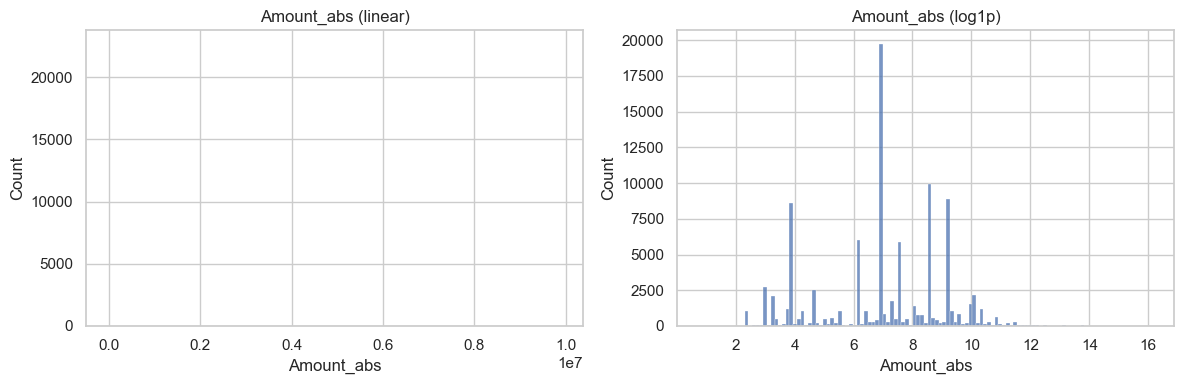

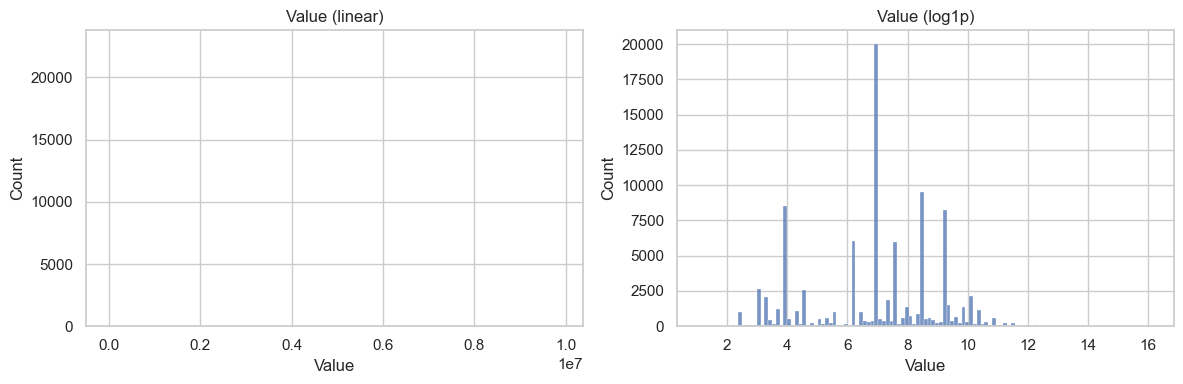

In [8]:
# Histograms + log-hist for skewed distributions
num_to_plot = ["Amount_abs", "Value"]
for col in num_to_plot:
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.histplot(df[col].dropna(), ax=axs[0], kde=False)
    axs[0].set_title(f"{col} (linear)")
    sns.histplot(np.log1p(df[col].dropna()), ax=axs[1], kde=False)
    axs[1].set_title(f"{col} (log1p)")
    plt.tight_layout()
    plt.show()


    # Both Amount_abs and Value are extremely right-skewed → log transformation required for modeling.

## 6. Distribution of Key Categorical Features

In [9]:
# show top categories for selected categorical columns
top_k = 10
for c in ["CountryCode","CurrencyCode","ProductCategory","ChannelId","ProviderId","PricingStrategy","FraudResult"]:
    if c in df.columns:
        print(f"\n{c} - unique: {df[c].nunique()}")
        display(df[c].value_counts(dropna=False).head(top_k))


CountryCode - unique: 1


CountryCode
256    95662
Name: count, dtype: int64


CurrencyCode - unique: 1


CurrencyCode
UGX    95662
Name: count, dtype: int64


ProductCategory - unique: 9


ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64


ChannelId - unique: 4


ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


ProviderId - unique: 6


ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64


PricingStrategy - unique: 4


PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64


FraudResult - unique: 2


FraudResult
0    95469
1      193
Name: count, dtype: int64

## 7. Correlation Analysis

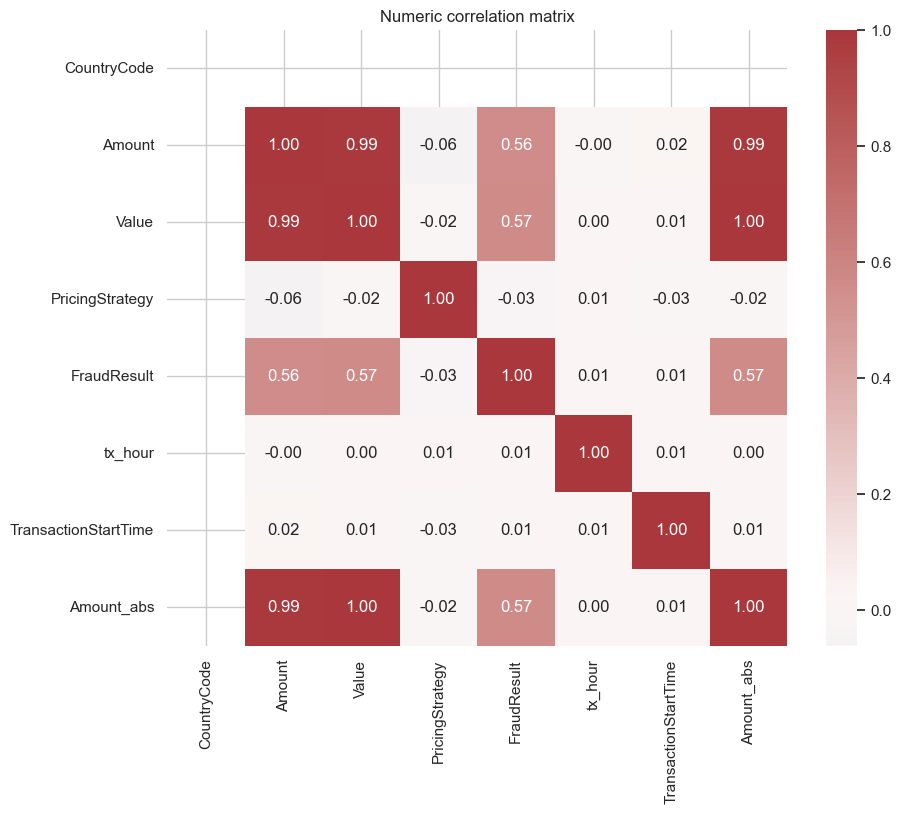

In [10]:
# Correlation matrix for numeric columns
num_cols = [
    'CountryCode',         # int64
    'Amount',              # float64
    'Value',               # int64
    'PricingStrategy',     # int64
    'FraudResult',         # int64
    'tx_hour',             # int32
    'TransactionStartTime' # datetime64[ns, UTC]
]
corr = df[num_cols + ["Amount_abs"]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Numeric correlation matrix")
plt.show()


Check for Missing Values

In [7]:
# missing values summary
missing = df.isna().sum().sort_values(ascending=False)
display(missing[missing > 0])

# visualize missingness fraction
missing_frac = (missing / len(df)).loc[missing > 0]
if not missing_frac.empty:
    missing_frac.plot(kind="barh")
    plt.xlabel("Fraction missing")
    plt.title("Missing value fractions")
    plt.show()
else:
    print("No missing values detected.")

Series([], dtype: int64)

No missing values detected.


## 8. Outlier Detection

IQR bounds for Amount_abs: lower=-6812.5, upper=12087.5
Outliers count: 8910 (9.31%)


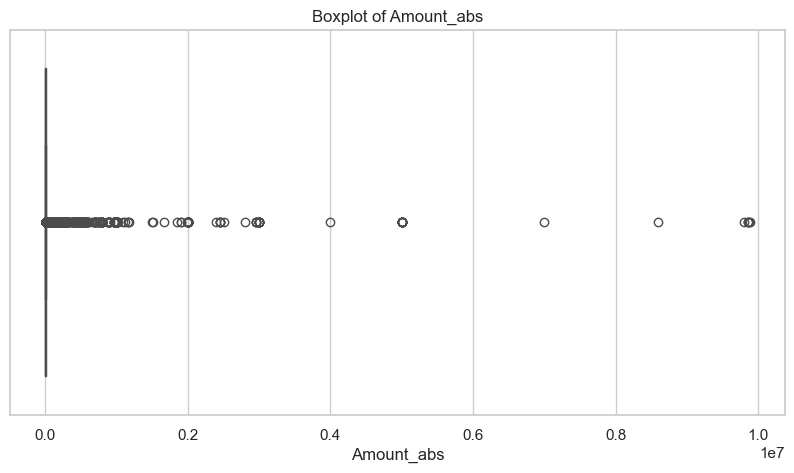

In [12]:
def iqr_outlier_stats(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return lower, upper

col = "Amount_abs"
lower, upper = iqr_outlier_stats(df[col].dropna())
print(f"IQR bounds for {col}: lower={lower}, upper={upper}")
outliers = df[(df[col] < lower) | (df[col] > upper)]
print(f"Outliers count: {len(outliers)} ({len(outliers)/len(df):.2%})")

# boxplot
sns.boxplot(x=df[col].dropna())
plt.title(f"Boxplot of {col}")
plt.show()


In [13]:
# Example aggregations per CustomerId
if "CustomerId" in df.columns:
    cust_agg = df.groupby("CustomerId").agg(
        tx_count=("TransactionId","count" if "TransactionId" in df.columns else "size"),
        tx_sum=("Amount_abs","sum"),
        tx_mean=("Amount_abs","mean"),
        first_tx=("TransactionStartTime","min"),
        last_tx=("TransactionStartTime","max"),
    )
    cust_agg["active_days"] = (cust_agg["last_tx"] - cust_agg["first_tx"]).dt.days.fillna(0)
    display(cust_agg.describe().T)

,count,mean,std,min,25%,50%,75%,max
tx_count,3742.0,25.564404,9.692960e+01,1.0,2.000000,7.000000,20.000000,4.091000e+03
tx_sum,3742.0,251991.140166,2.715529e+06,50.0,6450.000000,32000.000000,102000.000000,1.049000e+08
tx_mean,3742.0,18696.272809,1.674480e+05,50.0,1155.199013,3836.666667,7073.156593,8.601821e+06
active_days,3742.0,18.960449,2.687167e+01,0.0,0.000000,3.000000,32.000000,9.000000e+01


## 9. Column Classification (for Modeling)

In [8]:
# define candidate categorical columns (object-like or small unique counts)
# 1. Continuous numeric columns (true continuous values)
continuous_numeric_cols = ['Amount', 'Value', 'CountryCode']

# 2. Datetime columns (keep for RFM calculation, exclude from model)
datetime_cols = ['TransactionStartTime']

# 3. Categorical / discrete columns (including target)
categorical_cols = [
    'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult',
    'tx_hour', 'tx_dayofweek', 'tx_date', 'CurrencyCode',
    'ProviderId', 'ProductId'
]

# 4. ID-like columns (very high unique count) — exclude from modeling
id_like_cols = [
    c for c in df.columns 
    if df[c].nunique() > 1000 and c not in datetime_cols and c not in continuous_numeric_cols
]
# This will catch: TransactionId, BatchId, AccountId, SubscriptionId, CustomerId

# 5. Final features for modeling (everything except IDs and raw datetime)
features_for_modeling = [
    c for c in df.columns 
    if c not in id_like_cols and c not in datetime_cols
]

# Print clean summary
print("===  Column Categories ===")
print("Continuous numeric columns:", continuous_numeric_cols)
print("\nDatetime columns (for RFM only):", datetime_cols)
print("\nCategorical / discrete columns:", categorical_cols)
print("\nID-like columns (excluded):", id_like_cols)
print("\nFeatures you should actually use for modeling:", features_for_modeling)

print(f"\nTotal columns: {len(df.columns)}")
print(f"Continuous: {len(continuous_numeric_cols)}")
print(f"Datetime: {len(datetime_cols)}")
print(f"Categorical: {len(categorical_cols)}")
print(f"ID-like (excluded): {len(id_like_cols)}")
print(f"Features for modeling: {len(features_for_modeling)}")

===  Column Categories ===
Continuous numeric columns: ['Amount', 'Value', 'CountryCode']

Datetime columns (for RFM only): ['TransactionStartTime']

Categorical / discrete columns: ['ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult', 'tx_hour', 'tx_dayofweek', 'tx_date', 'CurrencyCode', 'ProviderId', 'ProductId']

ID-like columns (excluded): ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'Amount_abs']

Features you should actually use for modeling: ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'PricingStrategy', 'FraudResult', 'tx_date', 'tx_hour', 'tx_dayofweek', 'value_diff']

Total columns: 21
Continuous: 3
Datetime: 1
Categorical: 10
ID-like (excluded): 6
Features for modeling: 14


In [ ]:
continuous_numeric_cols = ['Amount', 'Value', 'CountryCode']
datetime_cols = ['TransactionStartTime']
id_like_cols = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId']

features_for_modeling = [
    'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId',
    'Amount_abs', 'fee', 'PricingStrategy', 'FraudResult',
    'tx_hour', 'tx_dayofweek', 'tx_date'
]

## 10. Save Data

In [9]:
# ensure directory exists
processed_path = Path("../data/processed")
processed_path.mkdir(parents=True, exist_ok=True)

# save EDA preview
df.to_parquet(
    processed_path / "eda_preview.parquet",
    index=False,
)
print("EDA preview saved to data/processed/eda_preview.parquet")

EDA preview saved to data/processed/eda_preview.parquet


## Top 5 Key Insights from EDA (Task 2 Deliverable)

1. **Severe Class Imbalance in Target**  
   Only 193 fraud cases out of 95,662 transactions → **0.20% fraud rate**. This confirms the need for a proxy target (RFM-based disengagement) instead of using FraudResult directly.

2. **Amount vs Value Relationship & Hidden Fees**  
   - 39.9% of transactions have negative Amount (refunds/cash-ins)  
   - In 2.68% of cases, `Value > |Amount|` → this difference is a **transaction fee/commission** (0.55–5,400 UGX)  
   → **Strong behavioral signal**: customers paying higher fees may be higher-risk or higher-value

3. **Extreme Right-Skew in Transaction Amounts**  
   Most transactions are small (< 10,000 UGX), but a long tail exists up to 98.8 million UGX. Log transformation clearly needed for modeling.

4. **Dominant Categories & Channels**  
   - Top 2 ProductCategories (financial_services + airtime) = 94% of volume  
   - ChannelId_3 (likely USSD) dominates with 59%, ChannelId_2 (web/app) with 39%  
   → Clear customer segments emerging

5. **Single Country & Currency**  
   All transactions are in Uganda (CountryCode 256, Currency UGX) → we can safely drop these columns.

**Bonus Insight**: Average customer has ~25 transactions over ~19 active days — perfect for RFM segmentation.